<a href="https://colab.research.google.com/github/MakkiFourati/RecSys-Thesis/blob/main/Category_Rec_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from datetime import date, datetime
from sklearn.model_selection import train_test_split

In [ ]:
labels = ['Trousers', 'Jacket','Bra']
#labels = ['Jacket']

In [ ]:
df_t = pd.read_csv('drive/MyDrive/Thesis/data/transactions_train.csv')
df_c = pd.read_csv('drive/MyDrive/Thesis/data/customers.csv')
df_a = pd.read_csv('drive/MyDrive/Thesis/data/articles.csv')

In [ ]:
#convert date column from string to datetime
df_t['t_dat'] = pd.to_datetime(df_t['t_dat'])
df_t.shape

(31788324, 5)

In [ ]:
#Take the last two months and half of transactions
start = datetime(2020,7,9)
df_t = df_t[(df_t['t_dat'] >= start)]

In [ ]:
df_a.head(8)

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
5,110065011,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,12,Light Beige,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
6,111565001,111565,20 den 1p Stockings,304,Underwear Tights,Socks & Tights,1010016,Solid,9,Black,...,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,"Semi shiny nylon stockings with a wide, reinfo..."
7,111565003,111565,20 den 1p Stockings,302,Socks,Socks & Tights,1010016,Solid,13,Beige,...,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,"Semi shiny nylon stockings with a wide, reinfo..."


In [ ]:
#Add articles data
df_t = df_t.merge(df_a[['article_id','product_type_name','index_group_name']], on='article_id')

In [ ]:
df_t

,t_dat,customer_id,article_id,price,sales_channel_id,product_type_name,index_group_name
0,2020-07-09,0005cd85a6220e1f1c582c7ff9175efe7d7c16d184c5ba...,913817001,0.016932,2,Leggings/Tights,Ladieswear
1,2020-07-09,0005cd85a6220e1f1c582c7ff9175efe7d7c16d184c5ba...,913817001,0.016932,2,Leggings/Tights,Ladieswear
2,2020-07-09,0d711cdeaa6c1cac6f3e39a648175e0e9a622349a3ca01...,913817001,0.016932,2,Leggings/Tights,Ladieswear
3,2020-07-09,347c0022a5463cd49ddbab9f7c178845a635584ffb83b6...,913817001,0.016932,2,Leggings/Tights,Ladieswear
4,2020-07-09,347c0022a5463cd49ddbab9f7c178845a635584ffb83b6...,913817001,0.016932,2,Leggings/Tights,Ladieswear
...,...,...,...,...,...,...,...
2999700,2020-09-22,ed6df0ac8b8fbdee3159f516406ee284fa76e6a7b17b21...,701134016,0.002814,1,Socks,Menswear
2999701,2020-09-22,ee9c048de16034be4aa95c91adce7f7bda442e6528406e...,810737015,0.033881,2,Sleeping sack,Baby/Children
2999702,2020-09-22,f26132ea566e3aac25c89925ba0ad88a34b67545f3c6db...,554450034,0.020322,2,Trousers,Divided
2999703,2020-09-22,f71529889de7a28df0015fad0a043941ecc98883286ef0...,737994021,0.030492,1,Leggings/Tights,Baby/Children


In [ ]:
df_t.groupby('index_group_name',dropna=False).count().sort_values('customer_id')

,t_dat,customer_id,article_id,price,sales_channel_id,product_type_name
index_group_name,,,,,,
Baby/Children,58113,58113,58113,58113,58113,58113
Sport,157818,157818,157818,157818,157818,157818
Menswear,179082,179082,179082,179082,179082,179082
Divided,656636,656636,656636,656636,656636,656636
Ladieswear,1948056,1948056,1948056,1948056,1948056,1948056


In [ ]:
#df = pd.DataFrame({'customer_id': df_t['customer_id'].unique()})
#df

In [ ]:
#Take the 2 first months of transactions for features 
#and last two weeks for target variables
last_2_weeks = df_t[(df_t['t_dat'] >= datetime(2020,9,9))]
first_weeks = df_t[(df_t['t_dat'] < datetime(2020,9,9))]

In [ ]:
customers = pd.DataFrame({'customer_id': first_weeks['customer_id'].unique()})

In [ ]:
df = pd.DataFrame({'customer_id': df_t['customer_id'].unique()})
df

,customer_id
0,0005cd85a6220e1f1c582c7ff9175efe7d7c16d184c5ba...
1,0d711cdeaa6c1cac6f3e39a648175e0e9a622349a3ca01...
2,347c0022a5463cd49ddbab9f7c178845a635584ffb83b6...
3,35b30f3a548188ffc21e968ed6558ad68bedca29c9fb41...
4,3ac2ac321f919b06adab77bb4cbb5a69e6f7c934cd4aeb...
...,...
458279,d88b6294f77728b7dbf48e499aa5693e479a87f4f67257...
458280,efe076ba5e5127f0043756e2eab265071a9d4d6276e1f2...
458281,43607919ccb0346d52221be57d648d4fa91334d981d91f...
458282,b9036ca1353cd6d07511e309f8acab557559b724a36419...


In [ ]:
#Remove products that don't figure out in the list of categories we're working on
def filter_labels(df, labels):

  df['product_type_name'] = df['product_type_name'].apply(lambda x : x if x in labels 
                                                          else np.nan)
  df = df.dropna(subset=['product_type_name'])
  df.reset_index(drop=True, inplace=True)

  return df

In [ ]:
last_2_weeks = filter_labels(last_2_weeks, labels)
first_weeks_filtered = filter_labels(first_weeks.copy(), labels)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
last_2_weeks

,t_dat,customer_id,article_id,price,sales_channel_id,product_type_name,index_group_name
0,2020-09-09,061fe95331cf6c410944fba0315aab62f5d2ad94fbeba9...,820308004,0.010153,1,Bra,Ladieswear
1,2020-09-09,1314fa70212f4b22efc2e38424b2dd9d8b17683087701b...,820308004,0.010153,1,Bra,Ladieswear
2,2020-09-09,251e6aa20eb1fda58f0240d545153b078d7049b25c769f...,820308004,0.010153,1,Bra,Ladieswear
3,2020-09-09,981106d916e905c38fea1b9029d53a82703cfeb9d0996d...,820308004,0.010153,1,Bra,Ladieswear
4,2020-09-09,e1637929146db185a06522bb33e9c030ca04d243e0febe...,820308004,0.008119,1,Bra,Ladieswear
...,...,...,...,...,...,...,...
115268,2020-09-22,d7b6ceed79f5bf84b6ce9088cbdb9569c3b63176ff873a...,874390010,0.013542,2,Trousers,Baby/Children
115269,2020-09-22,e0f201edb6f279df0f878d093d8a4b928c1c3c347a3c9b...,670687002,0.016932,2,Trousers,Ladieswear
115270,2020-09-22,e67d5d550775935890afdaf71b3361795f7047d400ea38...,879658001,0.050831,2,Trousers,Menswear
115271,2020-09-22,e67d5d550775935890afdaf71b3361795f7047d400ea38...,879658001,0.050831,2,Trousers,Menswear


In [ ]:
from sklearn.preprocessing import OneHotEncoder

#Encode categorical features then aggregate
def encode_transactions(df, transactions, how, agg_ft, column_to_encode):

  enc = OneHotEncoder(handle_unknown='ignore')
  enc.fit(transactions[[column_to_encode]])

  dum = enc.transform(transactions[[column_to_encode]]).toarray()
  transactions = pd.concat([transactions,pd.DataFrame(dum,columns=enc.categories_[0])],axis=1)

  columns = np.append(enc.categories_,['customer_id'])
  print(columns)
  transactions = transactions.loc[:,columns].groupby('customer_id', as_index=False).agg(agg_ft)
  print(enc.categories_[0])
  #Merge result with all customers and assign 0 to customers without purchase history
  df = df.merge(transactions, how = how, on = 'customer_id')
  df.fillna({t: 0 for t in enc.categories_[0]}, inplace=True)

  return df


In [ ]:
df = encode_transactions(df, last_2_weeks.copy(), 'left', 'max', 'product_type_name')
df

['Bra' 'Jacket' 'Trousers' 'customer_id']
['Bra' 'Jacket' 'Trousers']


,customer_id,Bra,Jacket,Trousers
0,0005cd85a6220e1f1c582c7ff9175efe7d7c16d184c5ba...,0.0,0.0,0.0
1,0d711cdeaa6c1cac6f3e39a648175e0e9a622349a3ca01...,0.0,0.0,0.0
2,347c0022a5463cd49ddbab9f7c178845a635584ffb83b6...,0.0,0.0,0.0
3,35b30f3a548188ffc21e968ed6558ad68bedca29c9fb41...,0.0,0.0,0.0
4,3ac2ac321f919b06adab77bb4cbb5a69e6f7c934cd4aeb...,0.0,0.0,0.0
...,...,...,...,...
458279,d88b6294f77728b7dbf48e499aa5693e479a87f4f67257...,0.0,0.0,0.0
458280,efe076ba5e5127f0043756e2eab265071a9d4d6276e1f2...,0.0,0.0,0.0
458281,43607919ccb0346d52221be57d648d4fa91334d981d91f...,1.0,0.0,0.0
458282,b9036ca1353cd6d07511e309f8acab557559b724a36419...,0.0,0.0,0.0


In [ ]:
df.groupby('Bra')['customer_id'].count()

Bra
0.0    446716
1.0     11568
Name: customer_id, dtype: int64

In [ ]:
df.groupby('Trousers')['customer_id'].count()

Trousers
0.0    418484
1.0     39800
Name: customer_id, dtype: int64

In [ ]:
df.groupby('Jacket')['customer_id'].count()

Jacket
0.0    446560
1.0     11724
Name: customer_id, dtype: int64

In [ ]:
df = df.merge(df_c, on = 'customer_id')
df

,customer_id,Bra,Jacket,Trousers,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,0005cd85a6220e1f1c582c7ff9175efe7d7c16d184c5ba...,0.0,0.0,0.0,NaN,NaN,ACTIVE,NONE,NaN,ee66d2b71f2fe333bee3e0f4a2dbac1fcf022e0df38763...
1,0d711cdeaa6c1cac6f3e39a648175e0e9a622349a3ca01...,0.0,0.0,0.0,1.0,1.0,ACTIVE,Regularly,50.0,43b01f04a152d658d0cac433d975b94817bb9a9e472332...
2,347c0022a5463cd49ddbab9f7c178845a635584ffb83b6...,0.0,0.0,0.0,NaN,NaN,ACTIVE,NONE,34.0,192cc36e7da7a272213c37860d28df0a4e2ef5dba08ad3...
3,35b30f3a548188ffc21e968ed6558ad68bedca29c9fb41...,0.0,0.0,0.0,1.0,1.0,ACTIVE,Regularly,48.0,76e4e729851f75a531631ed711a97e4547ac83bf137af7...
4,3ac2ac321f919b06adab77bb4cbb5a69e6f7c934cd4aeb...,0.0,0.0,0.0,1.0,1.0,ACTIVE,Regularly,65.0,d7b5f9ba3ee8d53ac07da7bf02e542ccbeecdaf6ac138e...
...,...,...,...,...,...,...,...,...,...,...
458279,d88b6294f77728b7dbf48e499aa5693e479a87f4f67257...,0.0,0.0,0.0,NaN,NaN,ACTIVE,NONE,24.0,aab7376002cc65b4dd3404dcac67803f274155b37608a0...
458280,efe076ba5e5127f0043756e2eab265071a9d4d6276e1f2...,0.0,0.0,0.0,NaN,NaN,ACTIVE,NONE,37.0,6bc393209d87516f75bd86cf533c6bfe8af5c9cf720446...
458281,43607919ccb0346d52221be57d648d4fa91334d981d91f...,1.0,0.0,0.0,NaN,NaN,ACTIVE,NONE,25.0,6d9a2f5dd3180289d4f2a30295434c7a22633e9d053870...
458282,b9036ca1353cd6d07511e309f8acab557559b724a36419...,0.0,0.0,0.0,1.0,1.0,ACTIVE,Regularly,23.0,aac6e9f0f7eb331db3c24472f0472c0c616f9be418be8c...


In [ ]:
df

,customer_id,Bra,Jacket,Trousers,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,0005cd85a6220e1f1c582c7ff9175efe7d7c16d184c5ba...,0.0,0.0,0.0,NaN,NaN,ACTIVE,NONE,NaN,ee66d2b71f2fe333bee3e0f4a2dbac1fcf022e0df38763...
1,0d711cdeaa6c1cac6f3e39a648175e0e9a622349a3ca01...,0.0,0.0,0.0,1.0,1.0,ACTIVE,Regularly,50.0,43b01f04a152d658d0cac433d975b94817bb9a9e472332...
2,347c0022a5463cd49ddbab9f7c178845a635584ffb83b6...,0.0,0.0,0.0,NaN,NaN,ACTIVE,NONE,34.0,192cc36e7da7a272213c37860d28df0a4e2ef5dba08ad3...
3,35b30f3a548188ffc21e968ed6558ad68bedca29c9fb41...,0.0,0.0,0.0,1.0,1.0,ACTIVE,Regularly,48.0,76e4e729851f75a531631ed711a97e4547ac83bf137af7...
4,3ac2ac321f919b06adab77bb4cbb5a69e6f7c934cd4aeb...,0.0,0.0,0.0,1.0,1.0,ACTIVE,Regularly,65.0,d7b5f9ba3ee8d53ac07da7bf02e542ccbeecdaf6ac138e...
...,...,...,...,...,...,...,...,...,...,...
458279,d88b6294f77728b7dbf48e499aa5693e479a87f4f67257...,0.0,0.0,0.0,NaN,NaN,ACTIVE,NONE,24.0,aab7376002cc65b4dd3404dcac67803f274155b37608a0...
458280,efe076ba5e5127f0043756e2eab265071a9d4d6276e1f2...,0.0,0.0,0.0,NaN,NaN,ACTIVE,NONE,37.0,6bc393209d87516f75bd86cf533c6bfe8af5c9cf720446...
458281,43607919ccb0346d52221be57d648d4fa91334d981d91f...,1.0,0.0,0.0,NaN,NaN,ACTIVE,NONE,25.0,6d9a2f5dd3180289d4f2a30295434c7a22633e9d053870...
458282,b9036ca1353cd6d07511e309f8acab557559b724a36419...,0.0,0.0,0.0,1.0,1.0,ACTIVE,Regularly,23.0,aac6e9f0f7eb331db3c24472f0472c0c616f9be418be8c...


In [ ]:
print('Number of Null values:')
print('FN: ' + str(df[df['FN'].isna()].shape[0]))
print('Active: ' + str(df[df['Active'].isna()].shape[0]))
print('club_member_status: ' + str(df[df['club_member_status'].isna()].shape[0]))
print('fashion_news_frequency : ' + str(df[df['fashion_news_frequency'].isna()].shape[0]))
print('age : ' + str(df[df['age'].isna()].shape[0]))

Number of Null values:
FN: 264111
Active: 267229
club_member_status: 649
fashion_news_frequency : 1686
age : 2487


In [ ]:
df.groupby('fashion_news_frequency',dropna=False).count()

,customer_id,Bra,Jacket,Trousers,FN,Active,club_member_status,age,postal_code
fashion_news_frequency,,,,,,,,,
Monthly,144,144,144,144,144,139,144,144,144
NONE,261898,261898,261898,261898,148,100,261443,260001,261898
Regularly,194556,194556,194556,194556,193881,190816,194491,194108,194556
NaN,1686,1686,1686,1686,0,0,1557,1544,1686


In [ ]:
df.groupby('club_member_status',dropna=False).count()

,customer_id,Bra,Jacket,Trousers,FN,Active,fashion_news_frequency,age,postal_code
club_member_status,,,,,,,,,
ACTIVE,449260,449260,449260,449260,193497,190406,447798,447450,449260
LEFT CLUB,53,53,53,53,0,0,53,53,53
PRE-CREATE,8322,8322,8322,8322,607,581,8227,7778,8322
NaN,649,649,649,649,69,68,520,516,649


In [ ]:
df['fashion_news_frequency'] = df['fashion_news_frequency'].fillna('NONE')
df['Active'] = df['Active'].fillna('0')
df.drop(columns=['FN','club_member_status'], inplace=True)

In [ ]:
encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(df[['fashion_news_frequency']])
encoder.categories_

[array(['Monthly', 'NONE', 'Regularly'], dtype=object)]

In [ ]:
dummy = encoder.transform(df[['fashion_news_frequency']]).toarray()
df = pd.concat([df,pd.DataFrame(dummy,columns=encoder.categories_[0])],axis=1)
df

,customer_id,Bra,Jacket,Trousers,Active,fashion_news_frequency,age,postal_code,Monthly,NONE,Regularly
0,0005cd85a6220e1f1c582c7ff9175efe7d7c16d184c5ba...,0.0,0.0,0.0,0,NONE,NaN,ee66d2b71f2fe333bee3e0f4a2dbac1fcf022e0df38763...,0.0,1.0,0.0
1,0d711cdeaa6c1cac6f3e39a648175e0e9a622349a3ca01...,0.0,0.0,0.0,1.0,Regularly,50.0,43b01f04a152d658d0cac433d975b94817bb9a9e472332...,0.0,0.0,1.0
2,347c0022a5463cd49ddbab9f7c178845a635584ffb83b6...,0.0,0.0,0.0,0,NONE,34.0,192cc36e7da7a272213c37860d28df0a4e2ef5dba08ad3...,0.0,1.0,0.0
3,35b30f3a548188ffc21e968ed6558ad68bedca29c9fb41...,0.0,0.0,0.0,1.0,Regularly,48.0,76e4e729851f75a531631ed711a97e4547ac83bf137af7...,0.0,0.0,1.0
4,3ac2ac321f919b06adab77bb4cbb5a69e6f7c934cd4aeb...,0.0,0.0,0.0,1.0,Regularly,65.0,d7b5f9ba3ee8d53ac07da7bf02e542ccbeecdaf6ac138e...,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
458279,d88b6294f77728b7dbf48e499aa5693e479a87f4f67257...,0.0,0.0,0.0,0,NONE,24.0,aab7376002cc65b4dd3404dcac67803f274155b37608a0...,0.0,1.0,0.0
458280,efe076ba5e5127f0043756e2eab265071a9d4d6276e1f2...,0.0,0.0,0.0,0,NONE,37.0,6bc393209d87516f75bd86cf533c6bfe8af5c9cf720446...,0.0,1.0,0.0
458281,43607919ccb0346d52221be57d648d4fa91334d981d91f...,1.0,0.0,0.0,0,NONE,25.0,6d9a2f5dd3180289d4f2a30295434c7a22633e9d053870...,0.0,1.0,0.0
458282,b9036ca1353cd6d07511e309f8acab557559b724a36419...,0.0,0.0,0.0,1.0,Regularly,23.0,aac6e9f0f7eb331db3c24472f0472c0c616f9be418be8c...,0.0,0.0,1.0


In [ ]:
df.drop(columns=['fashion_news_frequency'],inplace=True)

In [ ]:
df['age'].describe()

count    455797.000000
mean         35.050735
std          13.881559
min          16.000000
25%          24.000000
50%          30.000000
75%          47.000000
max          99.000000
Name: age, dtype: float64

In [ ]:
df['age'] = df['age'].fillna(30)

In [ ]:
postal_codes = {c:i for c,i in zip(df.sort_values('postal_code')['postal_code'].unique(), 
                                   range(df.shape[0]))}
df['postal_code'] = df['postal_code'].map(postal_codes)

In [ ]:
df

,customer_id,Bra,Jacket,Trousers,Active,age,postal_code,Monthly,NONE,Regularly
0,0005cd85a6220e1f1c582c7ff9175efe7d7c16d184c5ba...,0.0,0.0,0.0,0,30.0,213880,0.0,1.0,0.0
1,0d711cdeaa6c1cac6f3e39a648175e0e9a622349a3ca01...,0.0,0.0,0.0,1.0,50.0,60625,0.0,0.0,1.0
2,347c0022a5463cd49ddbab9f7c178845a635584ffb83b6...,0.0,0.0,0.0,0,34.0,22510,0.0,1.0,0.0
3,35b30f3a548188ffc21e968ed6558ad68bedca29c9fb41...,0.0,0.0,0.0,1.0,48.0,106596,0.0,0.0,1.0
4,3ac2ac321f919b06adab77bb4cbb5a69e6f7c934cd4aeb...,0.0,0.0,0.0,1.0,65.0,193334,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
458279,d88b6294f77728b7dbf48e499aa5693e479a87f4f67257...,0.0,0.0,0.0,0,24.0,153127,0.0,1.0,0.0
458280,efe076ba5e5127f0043756e2eab265071a9d4d6276e1f2...,0.0,0.0,0.0,0,37.0,96639,0.0,1.0,0.0
458281,43607919ccb0346d52221be57d648d4fa91334d981d91f...,1.0,0.0,0.0,0,25.0,98277,0.0,1.0,0.0
458282,b9036ca1353cd6d07511e309f8acab557559b724a36419...,0.0,0.0,0.0,1.0,23.0,153187,0.0,0.0,1.0


In [ ]:
#Rename target variables
df.rename(columns={o:n for o, n in zip(labels, ['target_' + l for l in labels])}, inplace = True)
df

,customer_id,target_Bra,target_Jacket,target_Trousers,Active,age,postal_code,Monthly,NONE,Regularly
0,0005cd85a6220e1f1c582c7ff9175efe7d7c16d184c5ba...,0.0,0.0,0.0,0,30.0,213880,0.0,1.0,0.0
1,0d711cdeaa6c1cac6f3e39a648175e0e9a622349a3ca01...,0.0,0.0,0.0,1.0,50.0,60625,0.0,0.0,1.0
2,347c0022a5463cd49ddbab9f7c178845a635584ffb83b6...,0.0,0.0,0.0,0,34.0,22510,0.0,1.0,0.0
3,35b30f3a548188ffc21e968ed6558ad68bedca29c9fb41...,0.0,0.0,0.0,1.0,48.0,106596,0.0,0.0,1.0
4,3ac2ac321f919b06adab77bb4cbb5a69e6f7c934cd4aeb...,0.0,0.0,0.0,1.0,65.0,193334,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
458279,d88b6294f77728b7dbf48e499aa5693e479a87f4f67257...,0.0,0.0,0.0,0,24.0,153127,0.0,1.0,0.0
458280,efe076ba5e5127f0043756e2eab265071a9d4d6276e1f2...,0.0,0.0,0.0,0,37.0,96639,0.0,1.0,0.0
458281,43607919ccb0346d52221be57d648d4fa91334d981d91f...,1.0,0.0,0.0,0,25.0,98277,0.0,1.0,0.0
458282,b9036ca1353cd6d07511e309f8acab557559b724a36419...,0.0,0.0,0.0,1.0,23.0,153187,0.0,0.0,1.0


In [ ]:
# Encode purchase count per type
df = encode_transactions(df, first_weeks_filtered.copy(), 'left', 'sum', 'product_type_name')
df

['Bra' 'Jacket' 'Trousers' 'customer_id']
['Bra' 'Jacket' 'Trousers']


,customer_id,target_Bra,target_Jacket,target_Trousers,Active,age,postal_code,Monthly,NONE,Regularly,Bra,Jacket,Trousers
0,0005cd85a6220e1f1c582c7ff9175efe7d7c16d184c5ba...,0.0,0.0,0.0,0,30.0,213880,0.0,1.0,0.0,0.0,0.0,0.0
1,0d711cdeaa6c1cac6f3e39a648175e0e9a622349a3ca01...,0.0,0.0,0.0,1.0,50.0,60625,0.0,0.0,1.0,0.0,0.0,1.0
2,347c0022a5463cd49ddbab9f7c178845a635584ffb83b6...,0.0,0.0,0.0,0,34.0,22510,0.0,1.0,0.0,0.0,0.0,3.0
3,35b30f3a548188ffc21e968ed6558ad68bedca29c9fb41...,0.0,0.0,0.0,1.0,48.0,106596,0.0,0.0,1.0,0.0,0.0,0.0
4,3ac2ac321f919b06adab77bb4cbb5a69e6f7c934cd4aeb...,0.0,0.0,0.0,1.0,65.0,193334,0.0,0.0,1.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
458279,d88b6294f77728b7dbf48e499aa5693e479a87f4f67257...,0.0,0.0,0.0,0,24.0,153127,0.0,1.0,0.0,0.0,0.0,0.0
458280,efe076ba5e5127f0043756e2eab265071a9d4d6276e1f2...,0.0,0.0,0.0,0,37.0,96639,0.0,1.0,0.0,0.0,0.0,0.0
458281,43607919ccb0346d52221be57d648d4fa91334d981d91f...,1.0,0.0,0.0,0,25.0,98277,0.0,1.0,0.0,0.0,0.0,0.0
458282,b9036ca1353cd6d07511e309f8acab557559b724a36419...,0.0,0.0,0.0,1.0,23.0,153187,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
df = encode_transactions(df, first_weeks.copy(), 'left', 'sum', 'index_group_name')
df

['Baby/Children' 'Divided' 'Ladieswear' 'Menswear' 'Sport' 'customer_id']
['Baby/Children' 'Divided' 'Ladieswear' 'Menswear' 'Sport']


,customer_id,target_Bra,target_Jacket,target_Trousers,Active,age,postal_code,Monthly,NONE,Regularly,Bra,Jacket,Trousers,Baby/Children,Divided,Ladieswear,Menswear,Sport
0,0005cd85a6220e1f1c582c7ff9175efe7d7c16d184c5ba...,0.0,0.0,0.0,0,30.0,213880,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0
1,0d711cdeaa6c1cac6f3e39a648175e0e9a622349a3ca01...,0.0,0.0,0.0,1.0,50.0,60625,0.0,0.0,1.0,0.0,0.0,1.0,0.0,8.0,4.0,0.0,0.0
2,347c0022a5463cd49ddbab9f7c178845a635584ffb83b6...,0.0,0.0,0.0,0,34.0,22510,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,10.0,0.0,4.0
3,35b30f3a548188ffc21e968ed6558ad68bedca29c9fb41...,0.0,0.0,0.0,1.0,48.0,106596,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0
4,3ac2ac321f919b06adab77bb4cbb5a69e6f7c934cd4aeb...,0.0,0.0,0.0,1.0,65.0,193334,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,6.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458279,d88b6294f77728b7dbf48e499aa5693e479a87f4f67257...,0.0,0.0,0.0,0,24.0,153127,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
458280,efe076ba5e5127f0043756e2eab265071a9d4d6276e1f2...,0.0,0.0,0.0,0,37.0,96639,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
458281,43607919ccb0346d52221be57d648d4fa91334d981d91f...,1.0,0.0,0.0,0,25.0,98277,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
458282,b9036ca1353cd6d07511e309f8acab557559b724a36419...,0.0,0.0,0.0,1.0,23.0,153187,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df=df.merge(customers, on = 'customer_id')
df

,customer_id,target_Bra,target_Jacket,target_Trousers,Active,age,postal_code,Monthly,NONE,Regularly,Bra,Jacket,Trousers,Baby/Children,Divided,Ladieswear,Menswear,Sport
0,0005cd85a6220e1f1c582c7ff9175efe7d7c16d184c5ba...,0.0,0.0,0.0,0,30.0,213880,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0
1,0d711cdeaa6c1cac6f3e39a648175e0e9a622349a3ca01...,0.0,0.0,0.0,1.0,50.0,60625,0.0,0.0,1.0,0.0,0.0,1.0,0.0,8.0,4.0,0.0,0.0
2,347c0022a5463cd49ddbab9f7c178845a635584ffb83b6...,0.0,0.0,0.0,0,34.0,22510,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,10.0,0.0,4.0
3,35b30f3a548188ffc21e968ed6558ad68bedca29c9fb41...,0.0,0.0,0.0,1.0,48.0,106596,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0
4,3ac2ac321f919b06adab77bb4cbb5a69e6f7c934cd4aeb...,0.0,0.0,0.0,1.0,65.0,193334,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,6.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409290,5246957244698dcdfdec006e5f4f4a6711b8177ac656a9...,0.0,0.0,0.0,0,52.0,85851,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
409291,1c5368a483ef3353f6a5259b1b8b4f92c2f45148b814fd...,0.0,0.0,0.0,0,25.0,70745,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
409292,35787a9b3b0d164b41cf49e78703b706813d88cea2fb0e...,0.0,0.0,0.0,1.0,52.0,100099,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
409293,59a8f768ceff1563a57ddf3e0e35e115cf09eda75bc81d...,0.0,0.0,0.0,0,26.0,41053,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.drop(columns=['Active',	'age',	'postal_code',	'Monthly',	'NONE',	'Regularly'])

,customer_id,target_Bra,target_Jacket,target_Trousers,Bra,Jacket,Trousers,Baby/Children,Divided,Ladieswear,Menswear,Sport
0,0005cd85a6220e1f1c582c7ff9175efe7d7c16d184c5ba...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0
1,0d711cdeaa6c1cac6f3e39a648175e0e9a622349a3ca01...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.0,4.0,0.0,0.0
2,347c0022a5463cd49ddbab9f7c178845a635584ffb83b6...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,10.0,0.0,4.0
3,35b30f3a548188ffc21e968ed6558ad68bedca29c9fb41...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0
4,3ac2ac321f919b06adab77bb4cbb5a69e6f7c934cd4aeb...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,6.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
409290,5246957244698dcdfdec006e5f4f4a6711b8177ac656a9...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
409291,1c5368a483ef3353f6a5259b1b8b4f92c2f45148b814fd...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
409292,35787a9b3b0d164b41cf49e78703b706813d88cea2fb0e...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
409293,59a8f768ceff1563a57ddf3e0e35e115cf09eda75bc81d...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_f = df.drop(columns=['customer_id'])

In [ ]:
df_f = df_f.astype('int32')

In [ ]:
df.groupby('Jacket')['customer_id'].count()

Jacket
0.0     382632
1.0      19712
2.0       4637
3.0       1318
4.0        567
5.0        189
6.0        133
7.0         44
8.0         23
9.0         19
10.0         7
11.0         6
12.0         1
14.0         2
15.0         4
23.0         1
Name: customer_id, dtype: int64

In [ ]:
df_f

,target_Bra,target_Jacket,target_Trousers,Active,age,postal_code,Monthly,NONE,Regularly,Bra,Jacket,Trousers,Baby/Children,Divided,Ladieswear,Menswear,Sport
0,0,0,0,0,30,213880,0,1,0,0,0,0,0,1,4,0,0
1,0,0,0,1,50,60625,0,0,1,0,0,1,0,8,4,0,0
2,0,0,0,0,34,22510,0,1,0,0,0,3,0,0,10,0,4
3,0,0,0,1,48,106596,0,0,1,0,0,0,0,0,4,0,0
4,0,0,0,1,65,193334,0,0,1,0,0,2,0,0,6,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409290,0,0,0,0,52,85851,0,1,0,0,0,0,0,0,0,0,0
409291,0,0,0,0,25,70745,0,1,0,0,0,0,0,0,0,0,0
409292,0,0,0,1,52,100099,0,0,1,0,0,1,0,0,0,0,0
409293,0,0,0,0,26,41053,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
dfs = {}
targets = df_f.iloc[:,:len(labels)]
df_f = df_f.iloc[:,len(labels):]
for i, l in enumerate(labels):
  lt = labels.copy()
  lt.remove(l)
  print(l)
  print(lt)
  dfs[l] = pd.concat([df_f, targets['target_'+l]]
                     ,axis=1).drop(columns=lt)
dfs['Bra']

Trousers
['Jacket', 'Bra']
Jacket
['Trousers', 'Bra']
Bra
['Trousers', 'Jacket']


,Active,age,postal_code,Monthly,NONE,Regularly,Bra,Baby/Children,Divided,Ladieswear,Menswear,Sport,target_Bra
0,0,30,213880,0,1,0,0,0,1,4,0,0,0
1,1,50,60625,0,0,1,0,0,8,4,0,0,0
2,0,34,22510,0,1,0,0,0,0,10,0,4,0
3,1,48,106596,0,0,1,0,0,0,4,0,0,0
4,1,65,193334,0,0,1,0,0,0,6,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
409290,0,52,85851,0,1,0,0,0,0,0,0,0,0
409291,0,25,70745,0,1,0,0,0,0,0,0,0,0
409292,1,52,100099,0,0,1,0,0,0,0,0,0,0
409293,0,26,41053,0,1,0,0,0,0,0,0,0,0


# Model

In [ ]:
df_f = dfs['Jacket']
df_f.rename(columns={'target_Jacket':'target'},inplace=True)
df_f

,Active,age,postal_code,Monthly,NONE,Regularly,Jacket,Baby/Children,Divided,Ladieswear,Menswear,Sport,target
0,0,30,213880,0,1,0,0,0,1,4,0,0,0
1,1,50,60625,0,0,1,0,0,8,4,0,0,0
2,0,34,22510,0,1,0,0,0,0,10,0,4,0
3,1,48,106596,0,0,1,0,0,0,4,0,0,0
4,1,65,193334,0,0,1,0,0,0,6,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
409290,0,52,85851,0,1,0,0,0,0,0,0,0,0
409291,0,25,70745,0,1,0,0,0,0,0,0,0,0
409292,1,52,100099,0,0,1,0,0,0,0,0,0,0
409293,0,26,41053,0,1,0,0,0,0,0,0,0,0


In [ ]:
counts = np.bincount(df_f['target'])
print(
    "Number of positive samples in training data: {} ({:.2f}% of total)".format(
        counts[1], 100 * float(counts[1]) / len(df_f['target'])
    )
)

weight_for_0 = 1.0 / counts[0]
weight_for_1 = 1.0 / counts[1]

Number of positive samples in training data: 7679 (1.88% of total)


target
0    401616
1      7679
dtype: int64


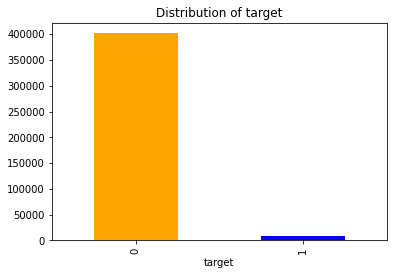

In [ ]:
#some imports to plot 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Print class freq. through pandas: we group the data by the column target and we count the number of rows 
target_dist = df_f.groupby('target').size()
print(target_dist)

target_dist.plot.bar(x='',y='',title='Distribution of target',color = ['orange', 'blue'])

In [ ]:
X = df_f.drop(columns=['target'])
y = df_f['target']
column_names = list(X)

In [ ]:
print(X.shape)
print(y.shape)

(409295, 12)
(409295,)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X) 
print(scaler)

StandardScaler()


In [ ]:
X_scaled = scaler.transform(X)

In [ ]:
X_scaled = pd.DataFrame(X_scaled)
X_scaled.columns = column_names
X_scaled.head()

,Active,age,postal_code,Monthly,NONE,Regularly,Jacket,Baby/Children,Divided,Ladieswear,Menswear,Sport
0,-0.851458,-0.359118,1.525255,-0.017408,0.865528,-0.864993,-0.217971,-0.274508,-0.096733,0.094523,-0.444115,-0.415508
1,1.174455,1.091955,-0.779870,-0.017408,-1.155364,1.156079,-0.217971,-0.274508,3.841782,0.094523,-0.444115,-0.415508
2,-0.851458,-0.068903,-1.353162,-0.017408,0.865528,-0.864993,-0.217971,-0.274508,-0.659378,1.461829,-0.444115,5.377010
3,1.174455,0.946847,-0.088416,-0.017408,-1.155364,1.156079,-0.217971,-0.274508,-0.659378,0.094523,-0.444115,-0.415508
4,1.174455,2.180259,1.216220,-0.017408,-1.155364,1.156079,-0.217971,-0.274508,-0.659378,0.550292,-0.444115,1.032621


In [ ]:
# import library
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE()

# fit predictor and target variable
X_smote, y_smote = smote.fit_resample(X_scaled, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0: 401616, 1: 7679})
Resample dataset shape Counter({0: 401616, 1: 401616})


In [ ]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

d=pd.concat([X_smote,y_smote],axis=1)
X0 = d[d['target']==0]
X1 = d[d['target']==1]

fig, axes = plt.subplots(ncols=3, nrows=5, figsize=(20,20))
fig.tight_layout()

for i, ax in zip(range(df.columns.size), axes.flat):
    sns.histplot(X0.iloc[:,i], color="blue", element="step", ax=ax,  alpha=0.3)
    sns.histplot(X1.iloc[:,i], color="red", element="step", ax=ax,  alpha=0.3)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

#Splitting data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, stratify=y_smote,
                                                    test_size=0.2,
                                                    random_state= 30
                                                   ) 
print(X_train.shape)

(642585, 12)


## Neural Net

In [ ]:
# load packages
import tensorflow as tf
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.preprocessing import LabelEncoder

In [ ]:
model = Sequential()
model.add(Dense(units=1000, activation=tf.keras.activations.relu,
                input_dim=X_train.shape[1]))
model.add(Dropout(0.3))
model.add(Dense(units=2000, activation=tf.keras.activations.relu))
model.add(Dense(units=2000, activation=tf.keras.activations.relu))
model.add(Dense(units=1, activation=tf.keras.activations.sigmoid))

In [ ]:
# Compile Model
# Optimization params

# Loss
loss = tf.keras.losses.BinaryCrossentropy()

# learning rate
lr = 0.0001
optimizer = tf.keras.optimizers.Adam(learning_rate=lr)

# Validation metrics
metrics = ['Accuracy','Precision','Recall']

model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              13000     
                                                                 
 dropout (Dropout)           (None, 1000)              0         
                                                                 
 dense_1 (Dense)             (None, 2000)              2002000   
                                                                 
 dense_2 (Dense)             (None, 2000)              4002000   
                                                                 
 dense_3 (Dense)             (None, 1)                 2001      
                                                                 
Total params: 6,019,001
Trainable params: 6,019,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_train

214139    0
620712    1
79337     0
739603    1
540291    1
         ..
514460    1
540851    1
700749    1
607836    1
480394    1
Name: target, Length: 642585, dtype: int32

In [ ]:
#class_weight = {0: weight_for_0, 1: weight_for_1}

history = model.fit(X_train, y_train, 
                    validation_split=0.2, 
                    epochs=80, 
                    batch_size=500,
                    #class_weight=class_weight
                    )

Epoch 1/80
1029/1029 [==============================] - 9s 8ms/step - loss: 0.6378 - Accuracy: 0.6362 - precision: 0.6636 - recall: 0.5519 - val_loss: 0.6273 - val_Accuracy: 0.6442 - val_precision: 0.6874 - val_recall: 0.5307
Epoch 2/80
1029/1029 [==============================] - 8s 7ms/step - loss: 0.6265 - Accuracy: 0.6454 - precision: 0.6725 - recall: 0.5664 - val_loss: 0.6206 - val_Accuracy: 0.6514 - val_precision: 0.6553 - val_recall: 0.6408
Epoch 3/80
1029/1029 [==============================] - 8s 7ms/step - loss: 0.6186 - Accuracy: 0.6525 - precision: 0.6780 - recall: 0.5805 - val_loss: 0.6123 - val_Accuracy: 0.6582 - val_precision: 0.6587 - val_recall: 0.6585
Epoch 4/80
1029/1029 [==============================] - 7s 7ms/step - loss: 0.6111 - Accuracy: 0.6595 - precision: 0.6840 - recall: 0.5927 - val_loss: 0.5995 - val_Accuracy: 0.6691 - val_precision: 0.6864 - val_recall: 0.6241
Epoch 5/80
1029/1029 [==============================] - 7s 7ms/step - loss: 0.6027 - Accuracy: 0

In [ ]:
#TEST ON YOUR TEST SET 
y_pred_prob = model.predict(X_test)
y_pred_train_prob = model.predict(X_train)

In [ ]:
y_pred_prob

array([[0.9315776 ],
       [0.1626736 ],
       [0.548999  ],
       ...,
       [0.9865398 ],
       [0.9842678 ],
       [0.99999666]], dtype=float32)

In [ ]:
y_pred = [1 if x > 0.45 else 0 for x in y_pred_prob.flatten()]
y_pred_train = [1 if x > 0.45 else 0 for x in y_pred_train_prob.flatten()]

In [ ]:
#EVALUATE YOUR PREDICTION (on the y_test that you left aside)
from sklearn import metrics

print('***RESULTS ON TRAIN SET***')
print("f1_score: ", metrics.f1_score(y_train, y_pred_train))
print("Precision: ", metrics.precision_score(y_train, y_pred_train))
print("Recall: ", metrics.recall_score(y_train, y_pred_train))
print("--")
print('***RESULTS ON TEST SET***')
print("f1_score: ", metrics.f1_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))

***RESULTS ON TRAIN SET***
f1_score:  0.8906547591655446
Precision:  0.8514070016603046
Recall:  0.9336958280940701
--
***RESULTS ON TEST SET***
f1_score:  0.8784503346404458
Precision:  0.8344741824537032
Recall:  0.9273193566057467


In [ ]:
#y_test.to_list()

              precision    recall  f1-score   support

           0       0.92      0.82      0.86     80323
           1       0.83      0.93      0.88     80324

    accuracy                           0.87    160647
   macro avg       0.88      0.87      0.87    160647
weighted avg       0.88      0.87      0.87    160647



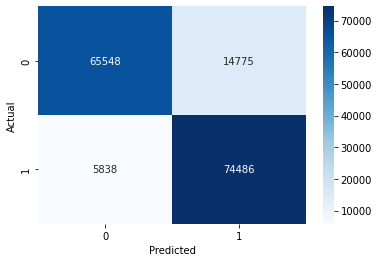

In [ ]:
y_pred=np.where(y_pred_prob > .45, 1,0).flatten()

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sn
import pandas as pd

print(classification_report(y_test, y_pred))

confusion_matrix = pd.crosstab( y_test,y_pred,rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True,fmt='g',cmap="Blues")
plt.show()

dict_keys(['loss', 'Accuracy', 'precision', 'recall', 'val_loss', 'val_Accuracy', 'val_precision', 'val_recall'])


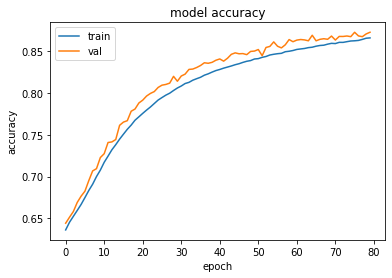

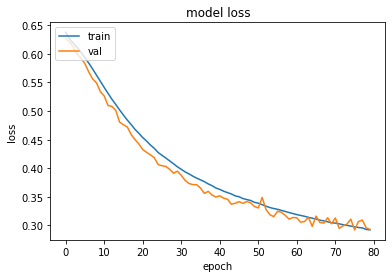

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['Accuracy'])
plt.plot(history.history['val_Accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()